# Working with Tweets

In this notebook, we will delve into the analysis of tweet contents.

We consider the dataset of tweets from Elon Musk, SpaceX and Tesla founder, and ask the following questions:
* What is Elon most actively tweeting about?
* Who is Elon most frequently referring to?

We will explore how to work with the contents of tweets.

In [9]:
# imports

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's get some basics (or a refresher) of working with texts in Python. Texts are sequences of discrete symbols (words or, more generically, tokens).

Key challenge: representing text for further processing. Two mainstream approaches:
* *Bag of words*: a text is a collection of tokens occurring with a certain frequence and assumed independently from each other within the text. The mapping from texts to features is determinsitic and straighforward, each text is represented as a vector of the size of the vocabulary.
* *Embeddings*: a method is used (typically, neural networks), to learn a mapping from each token to a (usually small) vector representing it. A text can be represented in turn as an aggregation of these embeddings.

## Import the dataset
Let us import the Elon Musk's tweets dataset in memory.

<img src="images/elon_loop.jpeg" width="400px" heigth="400px">

In [10]:
root_folder = "data"
df_elon = pd.read_csv(codecs.open(os.path.join(root_folder,"elonmusk_tweets.csv"), encoding="utf8"), sep=",")
df_elon['text'] = df_elon['text'].str[1:]

In [11]:
df_elon.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac..."
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g..."


In [12]:
df_elon.shape

(2819, 3)

## Working with tweet contents

In [13]:
# import some of the most popular libraries for NLP in Python
import nltk
import string
import sklearn

In [94]:
#nltk.download('punkt')

A typical NLP pipeline might look like the following:
    
<img src="images/spacy_pipeline.png" width="600px" heigth="600px">

### Tokenization: splitting a text into constituent tokens.

In [15]:
from nltk.tokenize import TweetTokenizer, word_tokenize
tknzr = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

In [16]:
example_tweet = df_elon.text[1]
print(example_tweet)

"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"


A tokenizer takes a string and outputs a list of tokens.

We compare here two tokenizers: one for general English texts, and one specialized for tweets.

In [19]:
tkz1 = tknzr.tokenize(example_tweet)
print(tkz1)
tkz2 = word_tokenize(example_tweet)
print(tkz2)

['"', '@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '\\', 'xe2', '\\', 'x80', '\\', 'xa6', 'https://t.co/qQcTqkzgMl', '"']
['``', '@', 'ForIn2020', '@', 'waltmossberg', '@', 'mims', '@', 'defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', 'that', "'s", 'irr\\xe2\\x80\\xa6', 'https', ':', '//t.co/qQcTqkzgMl', "''"]


**Question**: can you spot what the Twitter tokenizer is doing instead of a standard one?

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# some more pre-processing

def filter_twt(tweet):
    
    # remove punctuation and short words and urls
    tweet = [t for t in tweet if t not in string.punctuation and len(t) > 3 and not t.startswith("http")]
    return tweet

def tokenize_and_string(tweet):
    
    tkz = tknzr.tokenize(tweet)
    
    tkz = filter_twt(tkz)
    
    return " ".join(tkz)

In [22]:
print(tkz1)
print(filter_twt(tkz1))

['"', '@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '\\', 'xe2', '\\', 'x80', '\\', 'xa6', 'https://t.co/qQcTqkzgMl', '"']
['@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', 'Tesla', 'absurdly', 'overvalued', 'based', 'past', "that's"]


In [23]:
df_elon["clean_text"] = df_elon["text"].apply(tokenize_and_string)

In [24]:
df_elon.head(5)

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac...",@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'",@waltmossberg @mims @defcon_5 Walt
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...',Stormy weather Shortville
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g...",@DaveLeeBBC @verge Coal dying fracking It's ba...


In [25]:
# save cleaned up version

#df_elon.to_csv(os.path.join(root_folder,"df_elon.csv"), index=False)

### Building a dictionary

We want to build a dictionary of unique tokens, and then a "bag of words" representation for each tweet.

This is a matrix (like a 2-dimensional table) with one row per tweet and one column per token in the dictionary. The cell for each row/column (tweet/token) contains the number of times a token appears in the tweet.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=False, tokenizer=tknzr.tokenize)
X_count = count_vect.fit_transform(df_elon.clean_text)
X_count.shape

(2819, 7864)

In [27]:
word_list = count_vect.get_feature_names()  
count_list = X_count.toarray().sum(axis=0)
dictionary = dict(zip(word_list,count_list))
count_vect.vocabulary_.get("robots")

6617

In [28]:
X_count[:,count_vect.vocabulary_.get("robots")].toarray().sum()

3

In [29]:
dictionary["robots"]

3

#### Questions

* Find the tokens most used by Elon.
* Find the twitter users most referred to by Elon (hint: use the @ handler to spot them).

In [30]:
dictionary_list = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
[d for d in dictionary_list][:10]

[('Tesla', 322),
 ('Model', 236),
 ('that', 223),
 ('will', 218),
 ('with', 177),
 ('@SpaceX', 169),
 ('from', 163),
 ('this', 159),
 ('@TeslaMotors', 149),
 ('launch', 124)]

In [31]:
dictionary_list_users = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
[d for d in dictionary_list if d[0].startswith('@')][:10]

[('@SpaceX', 169),
 ('@TeslaMotors', 149),
 ('@elonmusk', 85),
 ('@NASA', 48),
 ('@Space_Station', 19),
 ('@FredericLambert', 17),
 ('@ID_AA_Carmack', 15),
 ('@WIRED', 14),
 ('@vicentes', 14),
 ('@BadAstronomer', 11)]

## Data visualization

The `pandas`' API provides integration with the plotting functionalities provided by the `matplotlib` library.

This seamless integration – which is very nice! – hides away from users some of the complexities of `matplotlib`.

However, as there cases where advanced customizations are needed, it's useful to learn the high-level plotting functionalities of `pandas` or `seaborn` as well as being aware of how to perform more advanced customizations by means of `matplotlib`.

Very useful [`matplotlib` cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

In [32]:
import numpy as np
import matplotlib.pyplot as plt

### Anatomy of a plot

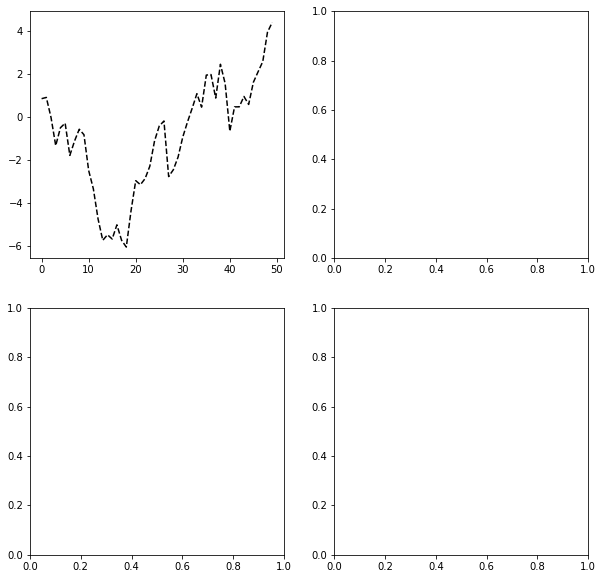

In [34]:
# first we create the figure, which is the 
# container where all plots reside

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.show()

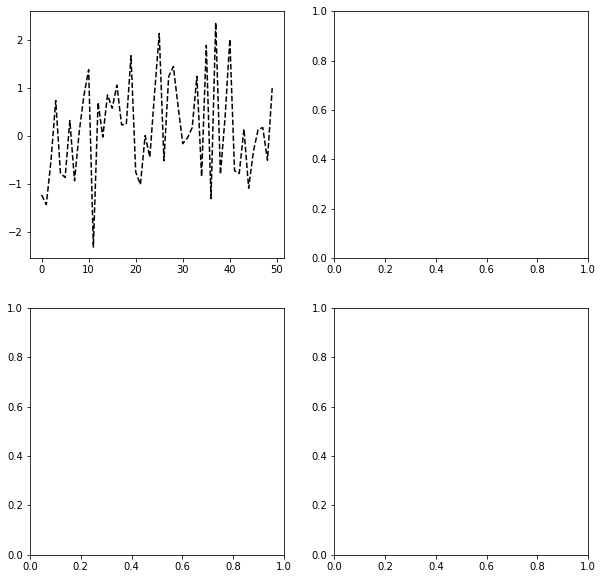

In [36]:
%matplotlib inline

# first we creta the figure, which is the 
# container where all plots reside
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50), 'k--')

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

Each plot resides within a `Figure` object.

Each subsplot resides within an `AxesSubplot` object.

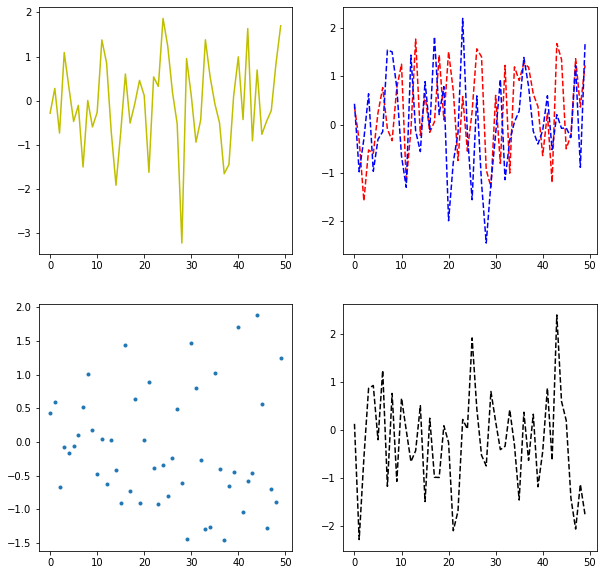

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,1].plot(np.random.randn(50), 'r--')
axes[0,1].plot(np.random.randn(50), 'b--')
axes[1,1].plot(np.random.randn(50), 'k--')
axes[1,0].plot(np.random.randn(50), '.')
axes[0,0].plot(np.random.randn(50), 'y-')
fig.set_size_inches(10, 10)

Let's plot the number of tweets mentioning one of the top 10 tokens over time.

In [50]:
df_elon.created_at = pd.to_datetime(df_elon.created_at)

In [51]:
df_elon["year"] = df_elon.created_at.dt.year

In [52]:
df_elon.head()

,id,created_at,text,clean_text,year
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...,robots spared humanity,2017
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac...",@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'",@waltmossberg @mims @defcon_5 Walt,2017
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...',Stormy weather Shortville,2017
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g...",@DaveLeeBBC @verge Coal dying fracking It's ba...,2017


In [63]:
# Doing some filtering here. Can you spot what this code does?

top_tokens = [d[0] for d in dictionary_list if not d[0].startswith("@") and d[0][0].isupper()][:10]

In [64]:
top_tokens

['Tesla',
 'Model',
 'Falcon',
 'Dragon',
 'Will',
 'SpaceX',
 'Just',
 'This',
 'Autopilot',
 'Mars']

You see we could still do some filtering, e.g., to remove common words which are capitalized, but let's go on like this.

In [90]:
which_word = 'Tesla'

df_elon["word_in_tweet"] = df_elon.clean_text.apply(lambda x: which_word in x)

In [91]:
d = df_elon.groupby('year').word_in_tweet.agg('sum')

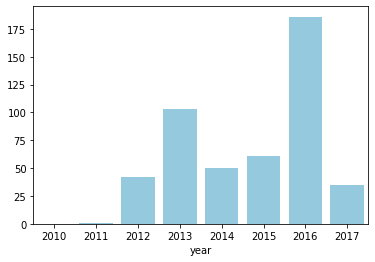

In [92]:
sns.barplot(d.index,d.values,color="skyblue")

**Question**: can you plot using `matplotlib` instead?

**Remark**: there is much more to this than plotting. Take a loot at the [Seaborn](https://seaborn.pydata.org/examples/index.html) or [Matplotlib](https://matplotlib.org/gallery.html) galleries for some compelling examples.

---

### Exercise 1.

* Plot the top n words together in a single figure, and show their trends over time.
* Do the same for the top n users mentioned.

In [93]:
# Your code here

---